Step 1: Loading The Dataset

In [17]:
# import necessary libraries
import pandas as pd  # For data analysis and manipulation
import numpy as np # For numerical computing
import matplotlib.pyplot as plt # Fro creating static,interactive and animaterd visualizations
import seaborn as sns #for making statistical graphics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


In [3]:
# Read the CSV file 'GHG_data.csv' into a Pandas DataFrame
df = pd.read_csv('GHG_data.csv')

df.head()

,Country,ISO2,ISO3,Industry,Gas_Type,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Carbon dioxide,194.398492,191.201537,192.473034,190.048764,190.966649,193.338608,187.562070,189.440100,188.437327,187.905257,182.266715,187.438675,184.520601
1,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Fluorinated gases,0.900844,0.948342,0.955449,1.029110,0.986873,1.011099,0.963934,0.950728,0.821667,0.783003,0.747345,0.702196,0.707047
2,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Greenhouse gas,1370.031102,1350.212366,1334.456632,1377.599894,1392.829858,1400.464829,1361.477669,1369.628014,1378.475201,1375.349001,1338.959570,1344.523950,1330.550899
3,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Methane,641.415104,636.893906,637.064644,633.493095,633.856107,639.263923,633.542996,639.543088,641.580792,634.344665,631.733383,630.457326,621.965004
4,Advanced Economies,NaN,AETMP,"Agriculture, Forestry and Fishing",Nitrous oxide,533.316661,521.168581,503.963505,553.028925,567.020229,566.851200,539.408671,539.694098,547.635416,552.316076,524.212127,525.925753,523.358247


In [4]:
# Get a Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   1186 non-null   object 
 1   ISO2      0 non-null      float64
 2   ISO3      1186 non-null   object 
 3   Industry  1186 non-null   object 
 4   Gas_Type  1186 non-null   object 
 5   F2010     1186 non-null   float64
 6   F2011     1186 non-null   float64
 7   F2012     1186 non-null   float64
 8   F2013     1186 non-null   float64
 9   F2014     1186 non-null   float64
 10  F2015     1186 non-null   float64
 11  F2016     1186 non-null   float64
 12  F2017     1186 non-null   float64
 13  F2018     1186 non-null   float64
 14  F2019     1186 non-null   float64
 15  F2020     1186 non-null   float64
 16  F2021     1186 non-null   float64
 17  F2022     1186 non-null   float64
dtypes: float64(14), object(4)
memory usage: 166.9+ KB


In [5]:
# Calculate the sum of null values for each column

df.isnull().sum()

,0
Country,0
ISO2,1186
ISO3,0
Industry,0
Gas_Type,0
F2010,0
F2011,0
F2012,0
F2013,0
F2014,0


In [6]:
# Drop the column named 'ISO2'
if 'ISO2' in df.columns:
    df = df.drop('ISO2',axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   1186 non-null   object 
 1   ISO3      1186 non-null   object 
 2   Industry  1186 non-null   object 
 3   Gas_Type  1186 non-null   object 
 4   F2010     1186 non-null   float64
 5   F2011     1186 non-null   float64
 6   F2012     1186 non-null   float64
 7   F2013     1186 non-null   float64
 8   F2014     1186 non-null   float64
 9   F2015     1186 non-null   float64
 10  F2016     1186 non-null   float64
 11  F2017     1186 non-null   float64
 12  F2018     1186 non-null   float64
 13  F2019     1186 non-null   float64
 14  F2020     1186 non-null   float64
 15  F2021     1186 non-null   float64
 16  F2022     1186 non-null   float64
dtypes: float64(13), object(4)
memory usage: 157.6+ KB


**Descriptive Analysis**

* **Total Emissions by Region**: Calculation of the total greenhouse gas emissions by region to identify which regions contribute the most to global emissions.

* **Industry-wise Emissions**: Analysis of the emissions by different industries to determine which sectors are the largest contributors to greenhouse gas emissions.

* **Gas Type Contribution**:  Examine the contribution of each type of gas (e.g., CO2, CH4, N2O) to the overall greenhouse gas emissions.




In [7]:
# melt the data
# Melt the data to have a 'Year' Column instead of individual columns for each year

df_melted = df.melt(id_vars = ["Country","ISO3","Industry","Gas_Type"],
                    var_name = "Year",
                    value_name = "Emissions")
df_melted.head()

,Country,ISO3,Industry,Gas_Type,Year,Emissions
0,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Carbon dioxide,F2010,194.398492
1,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Fluorinated gases,F2010,0.900844
2,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Greenhouse gas,F2010,1370.031102
3,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Methane,F2010,641.415104
4,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Nitrous oxide,F2010,533.316661


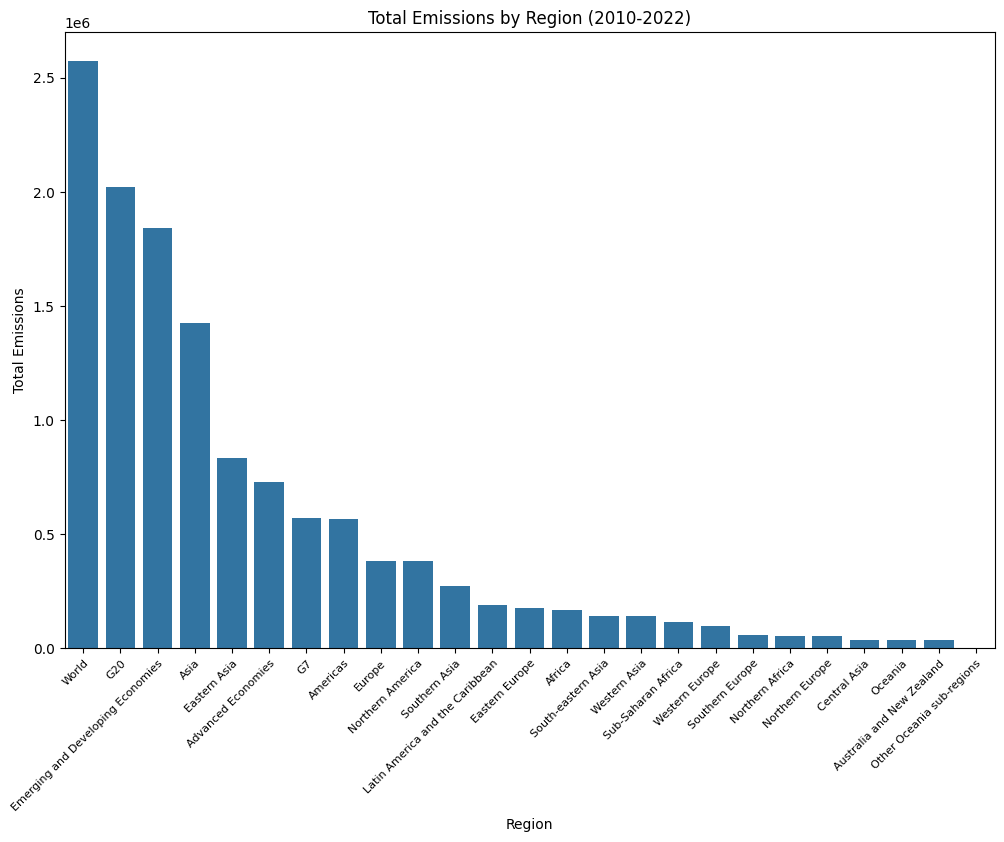

In [8]:
# Total Emission by Region
#To calculate the total emissions by region (Country) across all years and gas types

# Aggregate emissions by Region (Country)
emissions_by_region = df_melted.groupby('Country')['Emissions'].sum().sort_values(ascending=False)

# plot total emissions by region
plt.figure(figsize=(12,8))
sns.barplot(x=emissions_by_region.index, y=emissions_by_region.values)
plt.title('Total Emissions by Region (2010-2022)')
plt.xlabel('Region')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
plt.show()


<Figure size 1200x800 with 0 Axes>

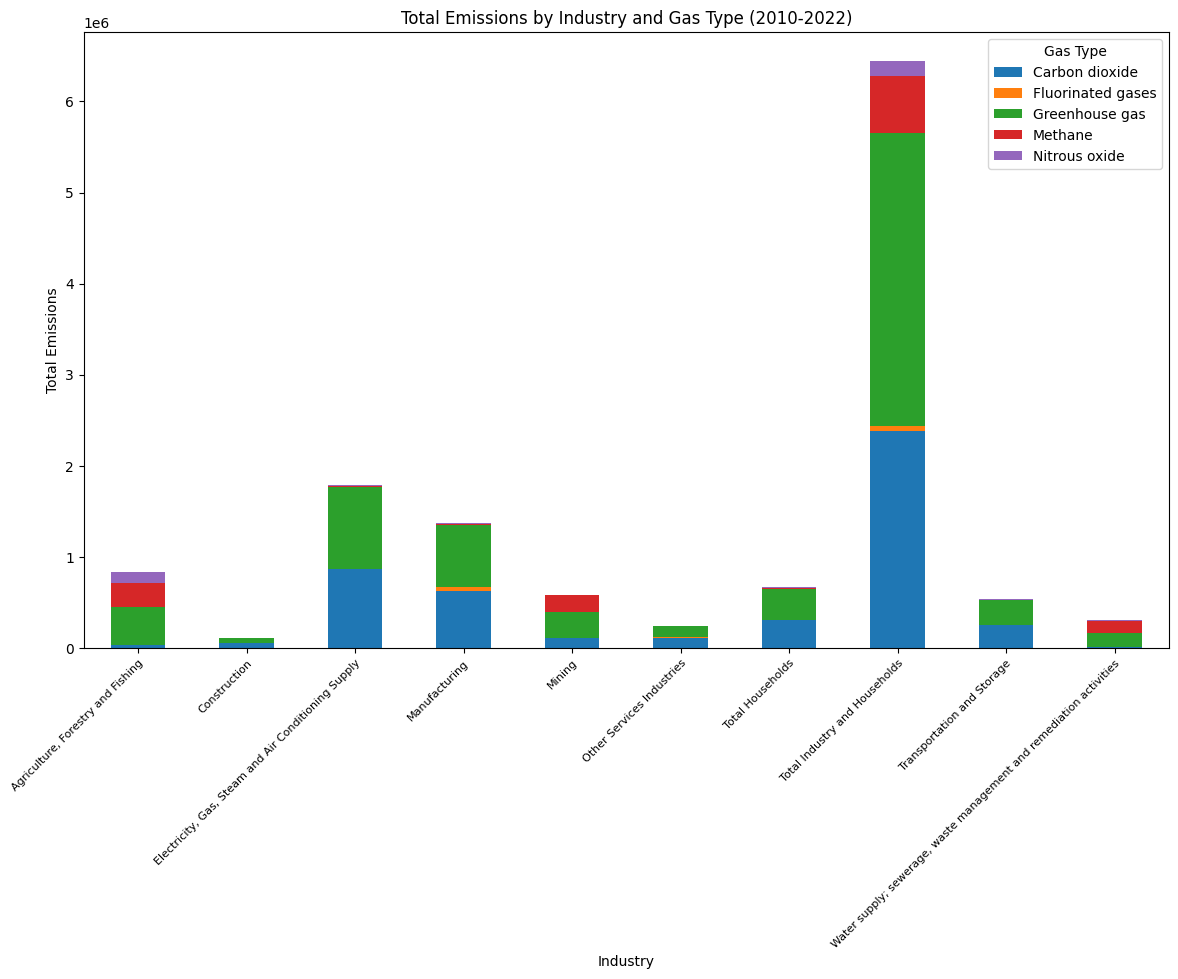

In [9]:
# Total Emission by Industry and gas type

# Group the data by 'Industry' and 'Gas_Type' and calculate the sum of emissions for each group
# Aggregate emissions by Industry and Gas_Type
emissions_by_industry_gas = df_melted.groupby(['Industry','Gas_Type'])['Emissions'].sum().unstack()
#print(emissions_by_industry_gas)

# Plot total emissions by industry for each gas type
plt.figure(figsize=(12,8))
emissions_by_industry_gas.plot(kind='bar',stacked=True,figsize=(14,8))
plt.title('Total Emissions by Industry and Gas Type (2010-2022)')
plt.xlabel('Industry')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
plt.legend(title='Gas Type')
plt.show()

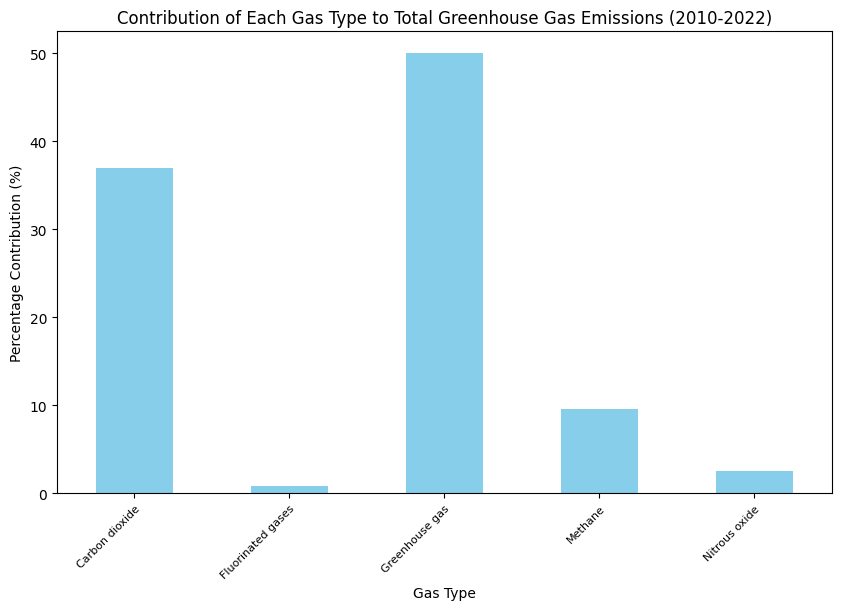

In [10]:
# Gas Type Contribution: Examine the contribution of each type of gas (e.g., CO2, CH4, N2O) to the overall greenhouse gas emissions.

# Aggregate emissions by Gas_Type
total_emissions_by_gas = df_melted.groupby('Gas_Type')['Emissions'].sum()

# Calculate the percentage contribution of each gas type
total_emissions = total_emissions_by_gas.sum()
gas_type_contribution = (total_emissions_by_gas / total_emissions) * 100

# Plot the contribution of each gas type to the overall emissions
plt.figure(figsize=(10, 6))
gas_type_contribution.plot(kind='bar', color='skyblue')
plt.title('Contribution of Each Gas Type to Total Greenhouse Gas Emissions (2010-2022)')
plt.xlabel('Gas Type')
plt.ylabel('Percentage Contribution (%)')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
plt.show()

# Temporal Analysis

* **Emissions Over Time**:  Analyze the trends in emissions over time. Determine whether emissions are increasing, decreasing, or remaining stable in various regions and industries.


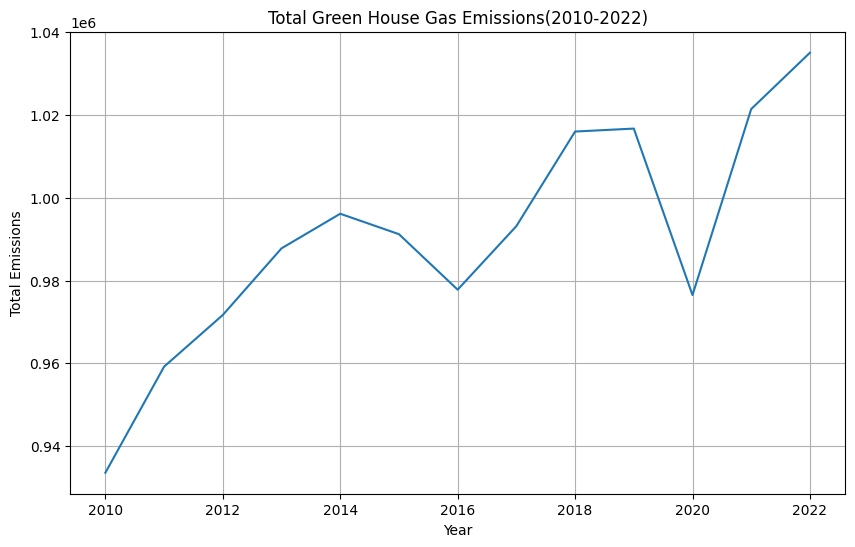

<ipython-input-11-7fdec6545d6c>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Emissions', hue='Country', data=df_melted, estimator='sum', ci=None)


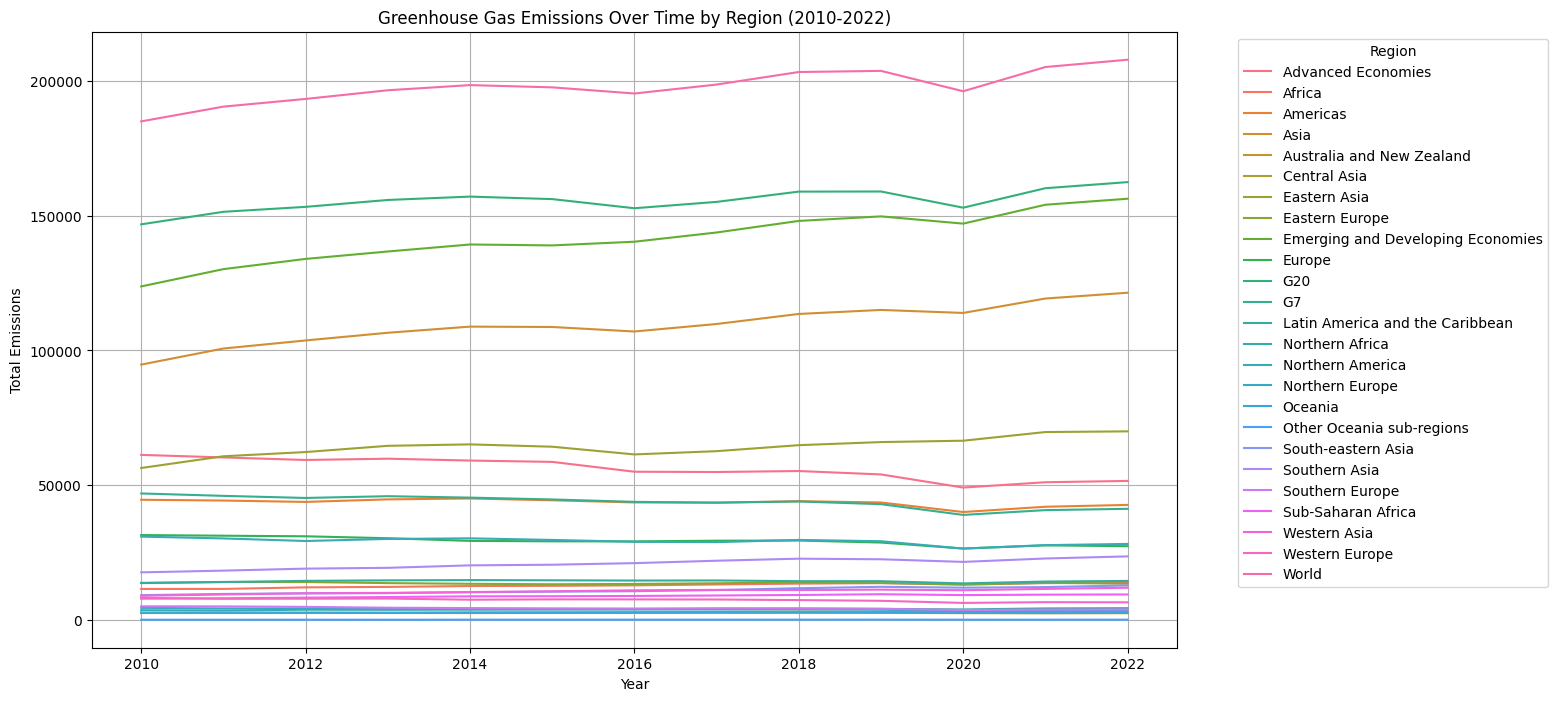

<ipython-input-11-7fdec6545d6c>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Emissions', hue='Industry', data=df_melted, estimator='sum', ci=None)


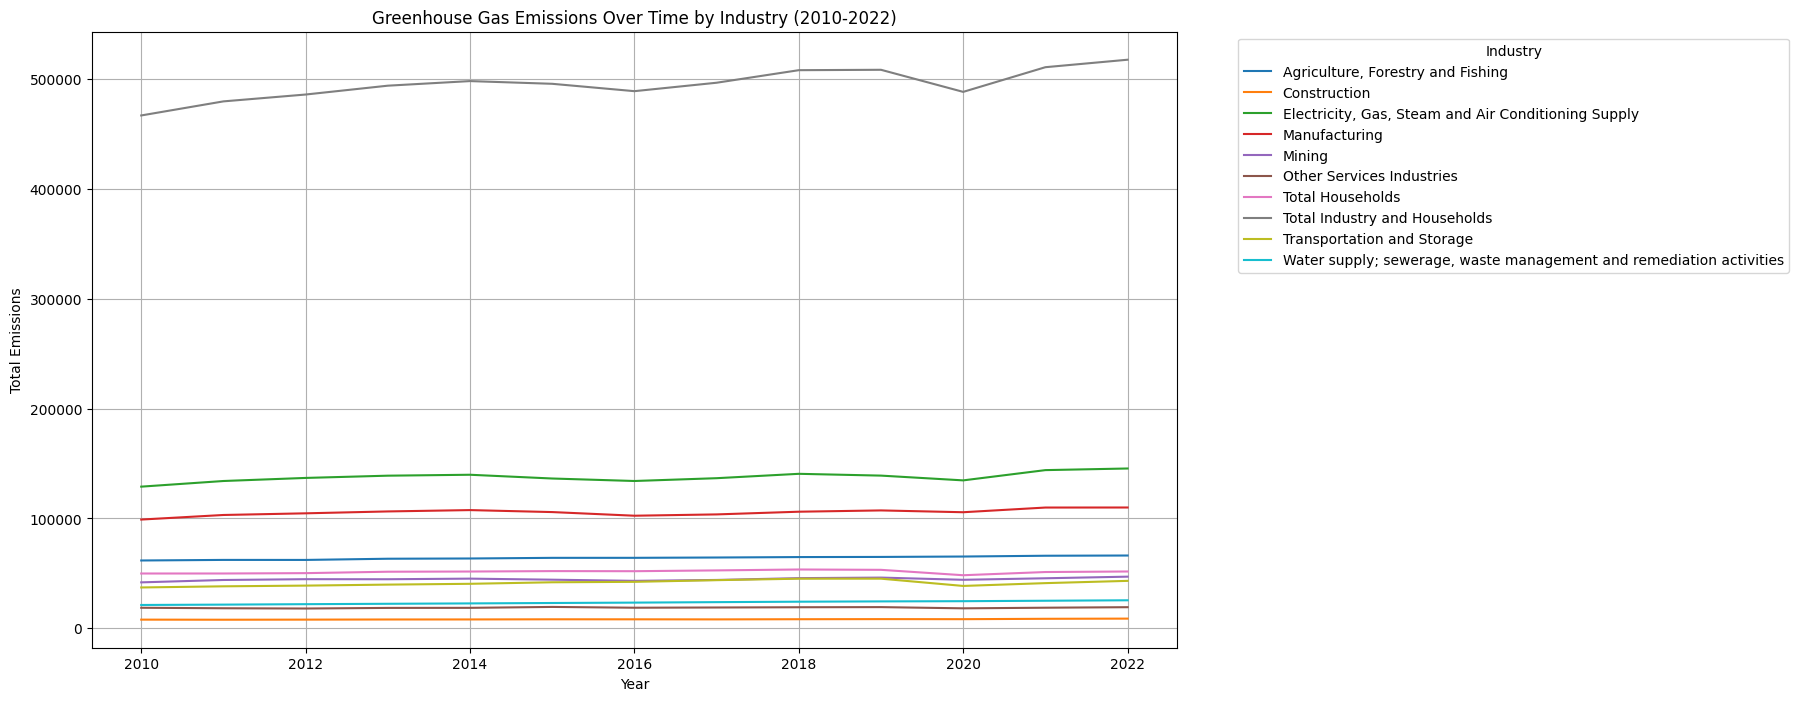

In [11]:
# Emissions over time

#convert the "Year" column to numeric
df_melted['Year'] = df_melted['Year'].str.replace('F','',regex=False)
df_melted['Year'] = pd.to_numeric(df_melted['Year'],errors='coerce')
df_melted['Year'] = df_melted['Year'].astype(int)


# Group by Year and sum emissions to see the overall trend
emissions_over_time = df_melted.groupby('Year')['Emissions'].sum()

# Plotting the trend of emissions over time
plt.figure(figsize = (10,6))
sns.lineplot(x=emissions_over_time.index, y=emissions_over_time.values)
plt.title('Total Green House Gas Emissions(2010-2022)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()


# Additional: Plot emissions trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Emissions', hue='Country', data=df_melted, estimator='sum', ci=None)
plt.title('Greenhouse Gas Emissions Over Time by Region (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Additional: Plot emissions trends by industry
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Emissions', hue='Industry', data=df_melted, estimator='sum', ci=None)
plt.title('Greenhouse Gas Emissions Over Time by Industry (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [13]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15418 entries, 0 to 15417
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    15418 non-null  object 
 1   ISO3       15418 non-null  object 
 2   Industry   15418 non-null  object 
 3   Gas_Type   15418 non-null  object 
 4   Year       15418 non-null  int64  
 5   Emissions  15418 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 722.8+ KB


Correlation Matrix

In [14]:
# Encode categorical variables into numerical ones
df_melted['Country_Encoded'] = df_melted['Country'].astype('category').cat.codes
df_melted['Industry_Encoded'] = df_melted['Industry'].astype('category').cat.codes
df_melted['Gas_Type_Encoded'] = df_melted['Gas_Type'].astype('category').cat.codes

In [15]:
# Create a new DataFrame with encoded columns
df_corr = df_melted[['Emissions', 'Country_Encoded', 'Industry_Encoded', 'Gas_Type_Encoded']]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Display the correlation matrix
print(correlation_matrix)


                  Emissions  Country_Encoded  Industry_Encoded  \
Emissions          1.000000        -0.025924          0.064274   
Country_Encoded   -0.025924         1.000000         -0.001910   
Industry_Encoded   0.064274        -0.001910          1.000000   
Gas_Type_Encoded  -0.118382         0.004889         -0.008055   

                  Gas_Type_Encoded  
Emissions                -0.118382  
Country_Encoded           0.004889  
Industry_Encoded         -0.008055  
Gas_Type_Encoded          1.000000  


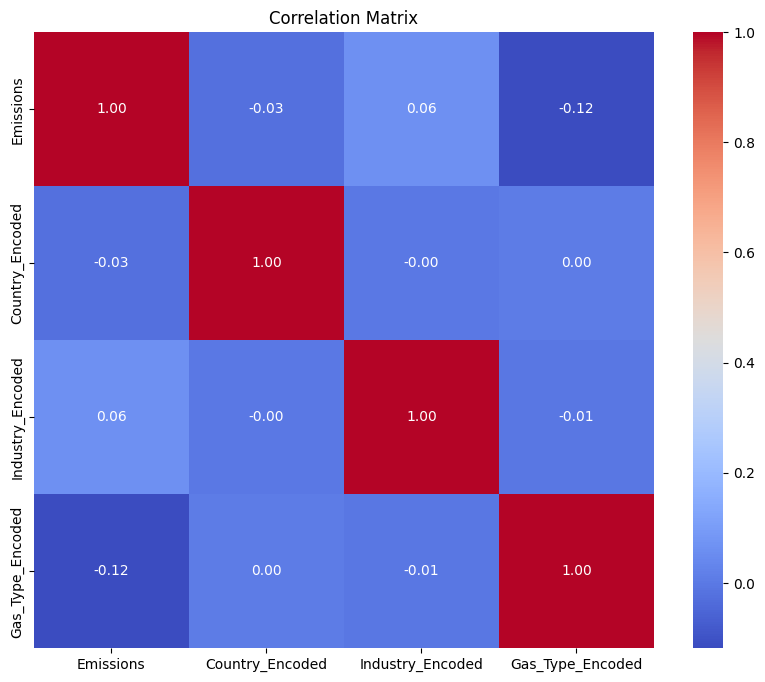

In [16]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Predictive Analysis

Mean Squared Error: 22890.83
R^2 Score: 1.00


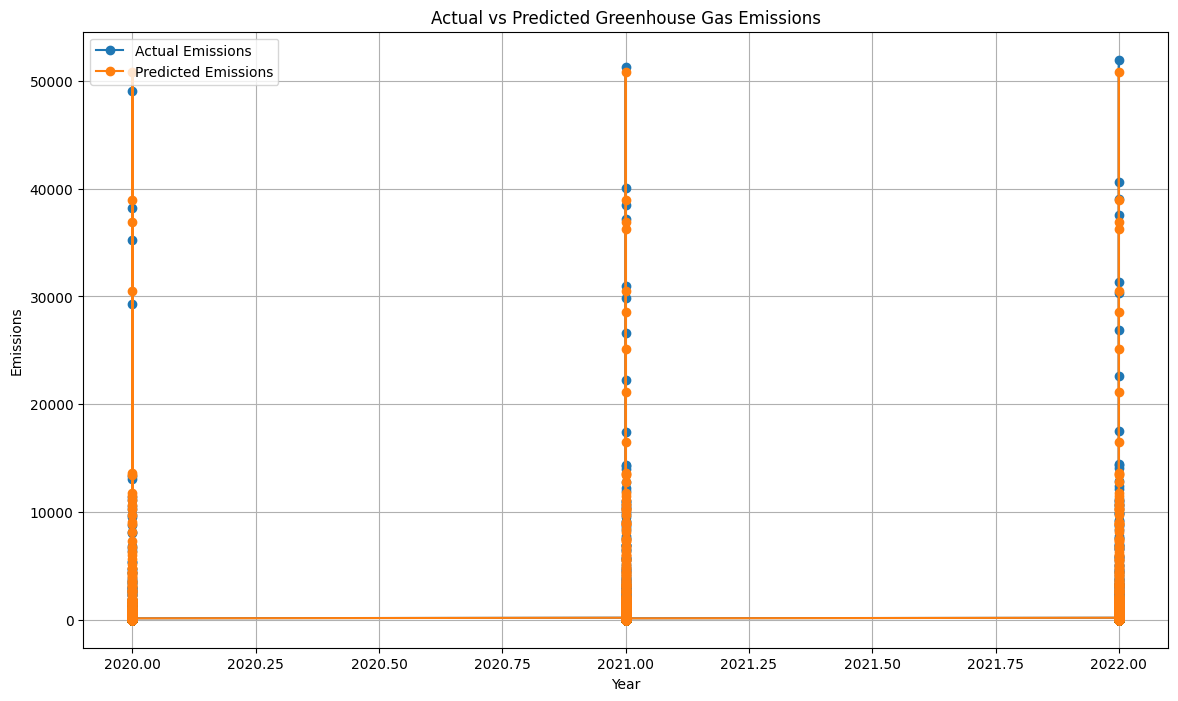

In [18]:
# Prepare the dataset for prediction (using the most recent years for testing)
X = df_melted[['Year', 'Country_Encoded', 'Industry_Encoded', 'Gas_Type_Encoded']]
y = df_melted['Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict future emissions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(X_test['Year'], y_test, label='Actual Emissions', marker='o')
plt.plot(X_test['Year'], y_pred, label='Predicted Emissions', marker='o')
plt.title('Actual vs Predicted Greenhouse Gas Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


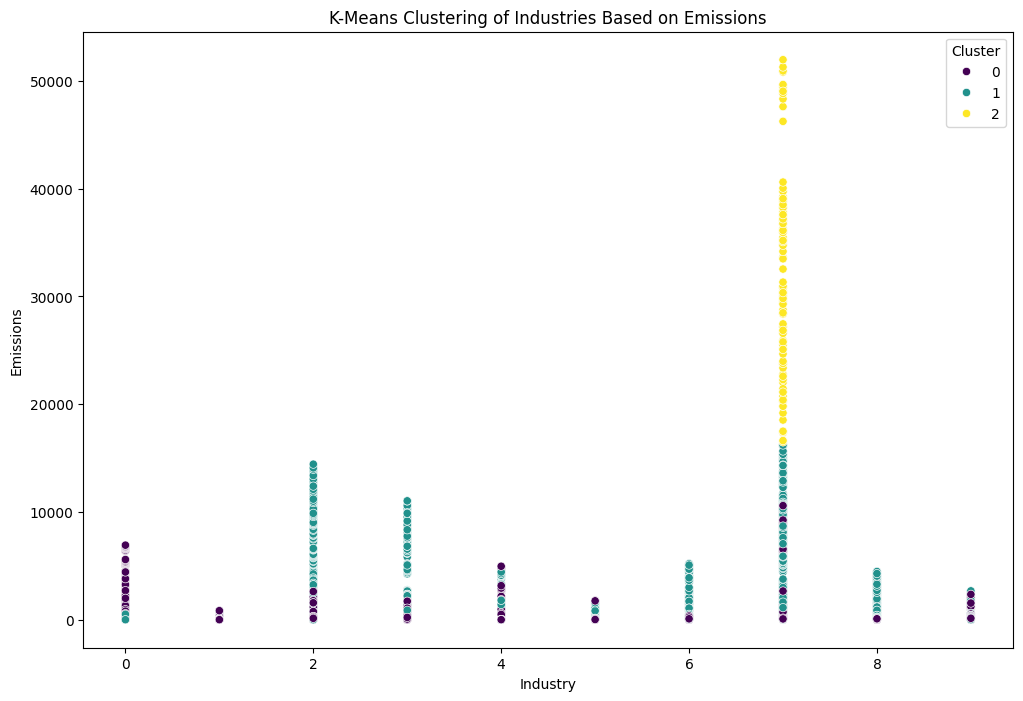

In [22]:
# clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_melted[['Country_Encoded', 'Industry_Encoded', 'Gas_Type_Encoded', 'Emissions']])

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_melted['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Industry_Encoded', y='Emissions', hue='Cluster', data=df_melted, palette='viridis')
plt.title('K-Means Clustering of Industries Based on Emissions')
plt.xlabel('Industry')
plt.ylabel('Emissions')
plt.legend(title='Cluster')
plt.show()


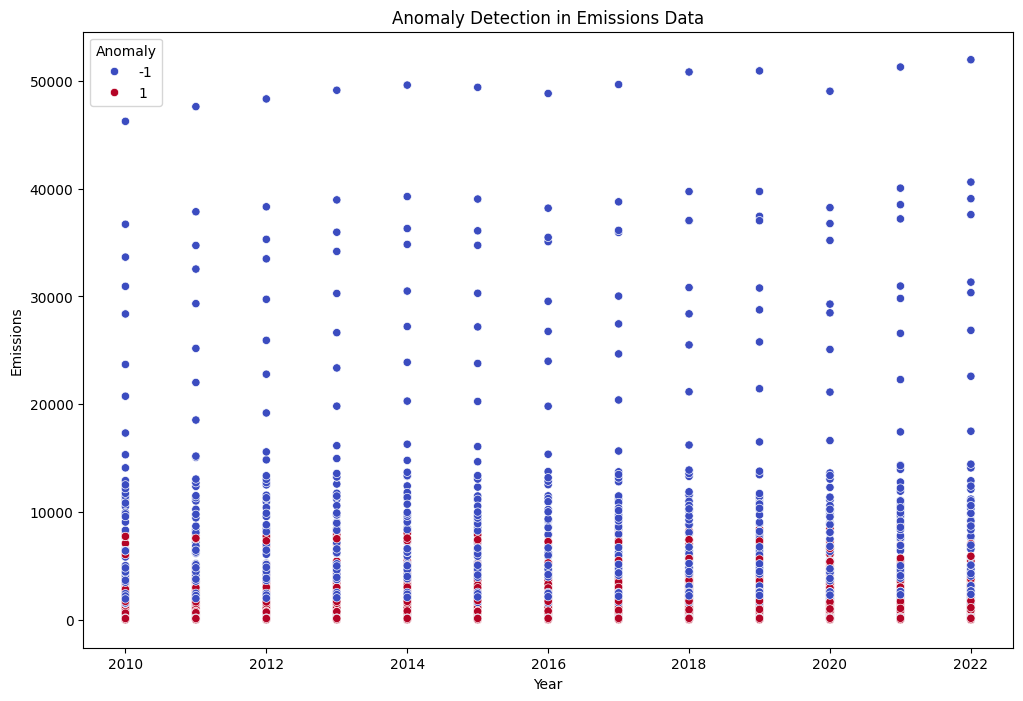

Identified Anomalies:


,Country,ISO3,Industry,Gas_Type,Year,Emissions,Country_Encoded,Industry_Encoded,Gas_Type_Encoded,Anomaly
0,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Carbon dioxide,2010,194.398492,0,0,0,-1
10,Advanced Economies,AETMP,"Electricity, Gas, Steam and Air Conditioning S...",Carbon dioxide,2010,4540.544861,0,2,0,-1
12,Advanced Economies,AETMP,"Electricity, Gas, Steam and Air Conditioning S...",Greenhouse gas,2010,4706.339270,0,2,2,-1
35,Advanced Economies,AETMP,Total Industry and Households,Carbon dioxide,2010,12907.016400,0,7,0,-1
37,Advanced Economies,AETMP,Total Industry and Households,Greenhouse gas,2010,15308.770350,0,7,2,-1
...,...,...,...,...,...,...,...,...,...,...
15408,World,WLD,Transportation and Storage,Carbon dioxide,2022,4051.647404,24,8,0,-1
15410,World,WLD,Transportation and Storage,Greenhouse gas,2022,4283.887966,24,8,2,-1
15413,World,WLD,"Water supply; sewerage, waste management and r...",Carbon dioxide,2022,177.237293,24,9,0,-1
15415,World,WLD,"Water supply; sewerage, waste management and r...",Greenhouse gas,2022,2675.233742,24,9,2,-1


In [21]:
# Anomaly detection
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_melted[['Country_Encoded', 'Industry_Encoded', 'Gas_Type_Encoded', 'Emissions']])


# Use Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_melted['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Filter anomalies
anomalies = df_melted[df_melted['Anomaly'] == -1]

# Visualize anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Emissions', hue='Anomaly', data=df_melted, palette='coolwarm')
plt.title('Anomaly Detection in Emissions Data')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend(title='Anomaly')
plt.show()

# Display the identified anomalies
print("Identified Anomalies:")
anomalies